# Determinación de eventos en ECG (paciente 208)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
import wfdb

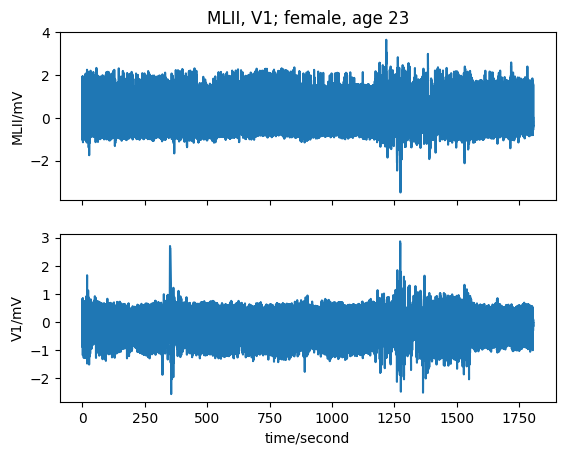

In [3]:
record3 = wfdb.rdrecord('208', pn_dir='mitdb')
wfdb.plot_wfdb(record=record3, title='MLII, V1; female, age 23')
#Podemos observar dos señales que provienen de las derivaciones respectivas de las cuales se toman los datos (MLII y V1)

In [5]:
array_signal3=record3.p_signal
fs3=record3.fs #360
n3=np.arange(len(array_signal3))
t3=n3*(1/fs3)

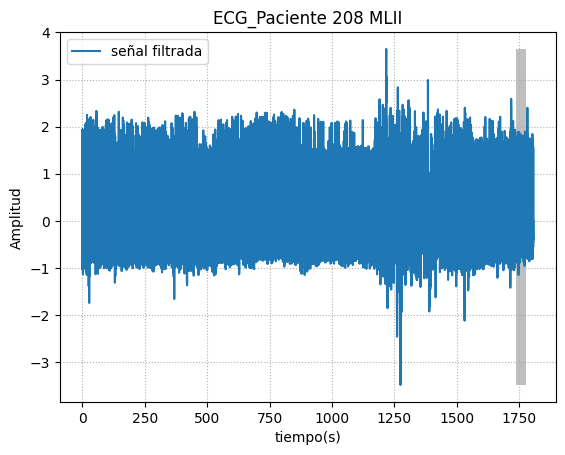

In [8]:
#Delimitación visual del momento de análisis
rect_start = 1738  # Índice de inicio del rectángulo
rect_end = 1777  # Índice de fin del rectángulo

plt.figure()
plt.plot(t3,array_signal3[:,0], label="señal filtrada")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("tiempo(s)")
plt.ylabel("Amplitud")
plt.title("ECG_Paciente 208 MLII")
plt.legend(loc="upper right")

# Creación del rectángulo
rect_width = rect_end - rect_start
rect_height = np.max(array_signal3[:,0]) - np.min(array_signal3[:,0])
rect = plt.Rectangle((rect_start, np.min(array_signal3[:,0])), rect_width, rect_height, facecolor='gray', alpha=0.5)
plt.gca().add_patch(rect)

plt.legend()
plt.show()

Text(0.5, 1.0, "MLII; female, age 23'(Pareado ventricular)")

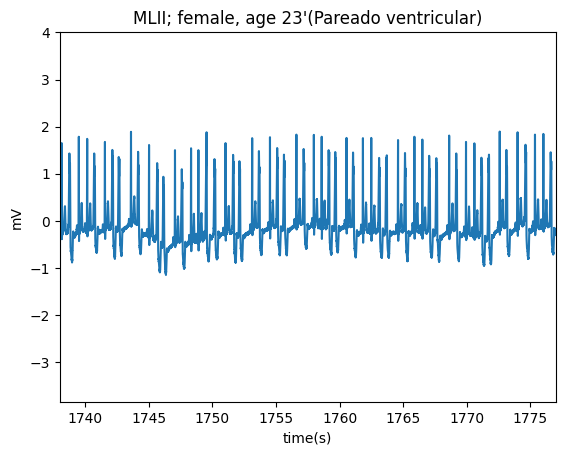

In [10]:
signal208_1=array_signal3[:,0] #Solamente para la derivación MLII
plt.plot(t3,signal208_1)
plt.xlim([1738,1777]);plt.xlabel("time(s)");plt.ylabel("mV")
plt.title("MLII; female, age 23'(Pareado ventricular)")

Text(0.5, 1.0, " V1; female, age 23' (Pareado ventricular)")

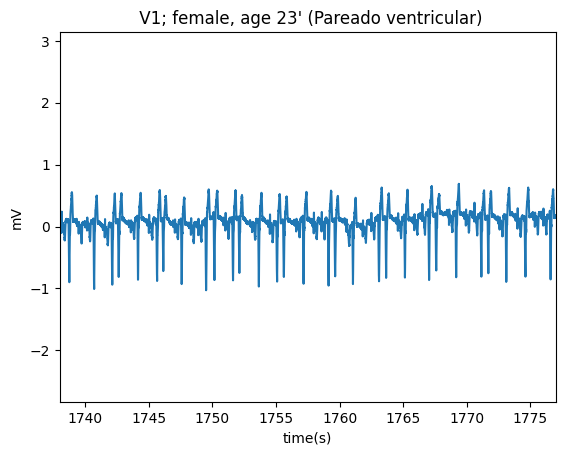

In [15]:
signal208_2=array_signal3[:,1] #Solamente para la derivación V1
plt.plot(t3,signal208_2)
plt.xlim([1738,1777]);plt.xlabel("time(s)");plt.ylabel("mV")
#plt.ylim([-0.5,0.5])
plt.title(" V1; female, age 23' (Pareado ventricular)")

# Detección de momentos de Ruido en la señal

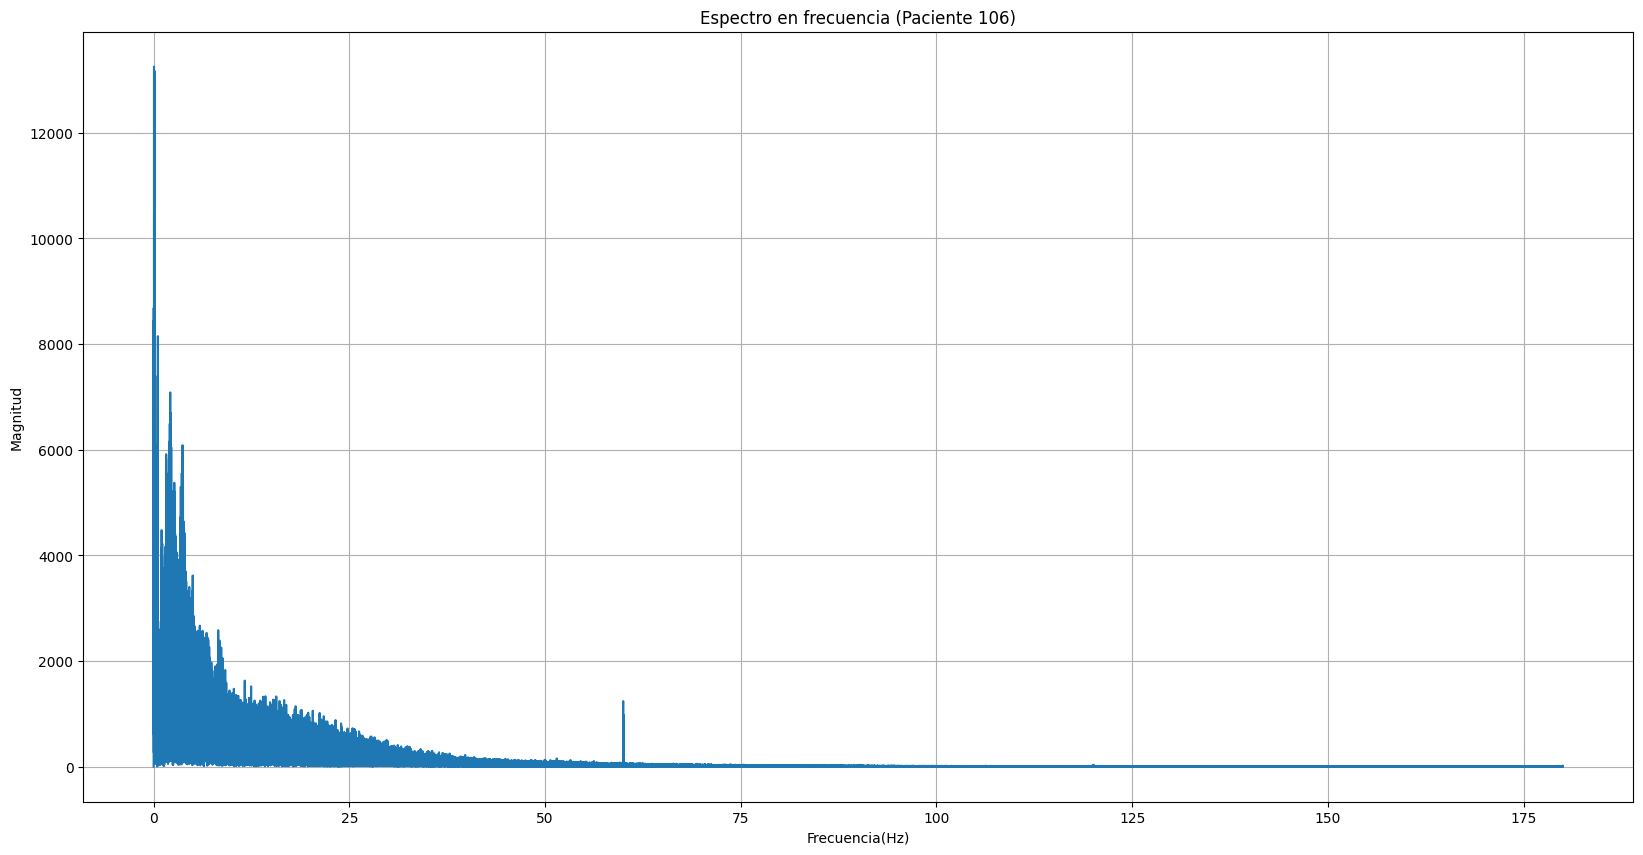

In [16]:
#Elminiación del ruido

# Analizar el Fourier para la primera señal
array_ECG_final=signal208_1-np.mean(signal208_1)
N1 = len(array_ECG_final)
yf = np.fft.fft(array_ECG_final,N1)
yf = yf[0:(N1//2)]
yf1 = np.abs(yf)
yf1 = np.round(yf1,3)
F = np.linspace(0, fs3/2, N1//2)
plt.figure(figsize=(20,10))
plt.plot(F,yf1)
plt.grid()
plt.xlabel("Frecuencia(Hz)")
plt.ylabel("Magnitud")
plt.title("Espectro en frecuencia (Paciente 106)")
plt.show()

Text(0, 0.5, 'Magnitud')

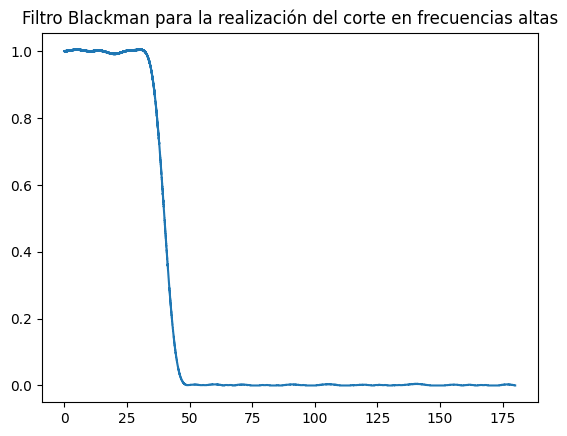

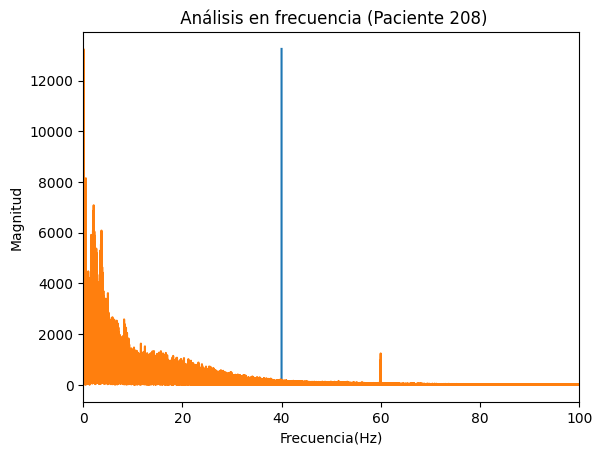

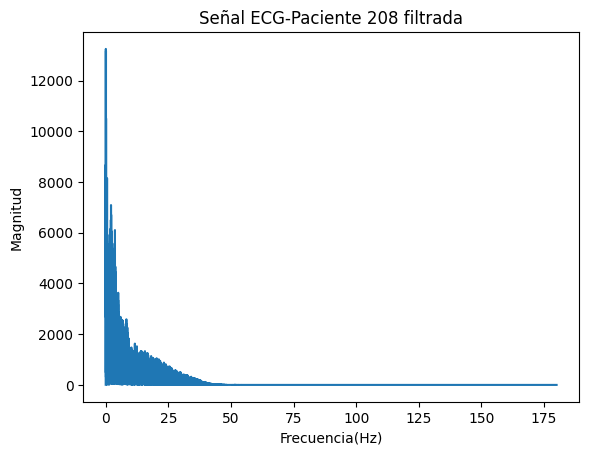

In [17]:
#Evidencia mediante la transformada de Fourier de ruido en 60Hz (Probablemente en sus armónicos también se observe)
#Para el diseño del FIR vamos a incluir el diseño con la ventaba Blackman. Esto se realiza porque la atenuación que genera es mucho mayor que a
#las diferentes ventanas que se aplican

#longitud de la ventana
M = 100

#frecuencia de corte en Hz para elimiar el ruido 60 Hz
Fc = 40 

#Frecuencia de corte en radianes
wc = 2*np.pi*Fc/fs3

# filtro fir
w = firwin(numtaps=M, cutoff=Fc, window='blackman', fs=fs3)
w = np.round(w,3)
nm = np.arange(M)
W = np.fft.fft(w,N1)
W = np.round(W[0:N1//2],3)


#magnitud
Wm = np.abs(W)
Rx = Fc*np.ones([N1//2])
Ry = np.linspace(0,1,N1//2)
Ry = np.linspace(0,np.max(yf1),N1//2) #el eje y

plt.figure()
plt.plot(F,Wm)
plt.title("Filtro Blackman para la realización del corte en frecuencias altas")

plt.figure()
plt.plot(Rx,Ry)
plt.plot(F,yf1)
plt.xlim([0,100])
#plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia (Paciente 208)")
plt.xlabel("Frecuencia(Hz)")
plt.ylabel("Magnitud")

#Aplicación del filtro

Sf = lfilter(w, np.array(1),array_ECG_final)

# Se hace la conversión a Frecuencia 
Sff = np.fft.fft(Sf,N1)
Sff = Sff[0:(N1//2)]
Sff1 = np.abs(Sff)
Sff1 = np.round(Sff1,3)
plt.figure()
plt.plot(F,Sff1)
plt.title("Señal ECG-Paciente 208 filtrada")
plt.xlabel("Frecuencia(Hz)")
plt.ylabel("Magnitud")

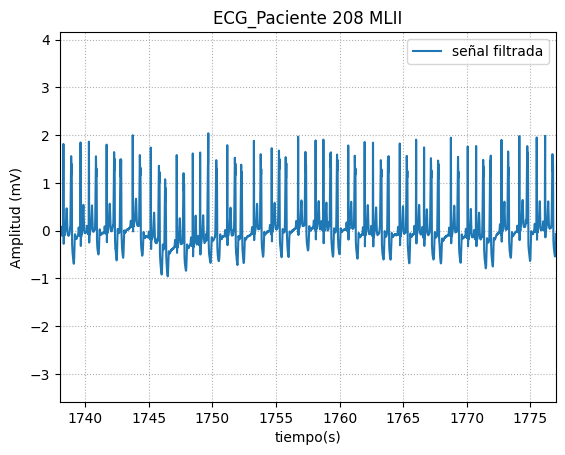

In [21]:
#Reconstrucción de la señal para la paciente 106
plt.figure()
plt.plot(t3,Sf, label="señal filtrada")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("tiempo(s)")
plt.ylabel("Amplitud (mV)")
plt.title("ECG_Paciente 208 MLII")
plt.legend(loc="upper right")
plt.xlim([1738,1777])
#plt.ylim([-100,100])

plt.show()

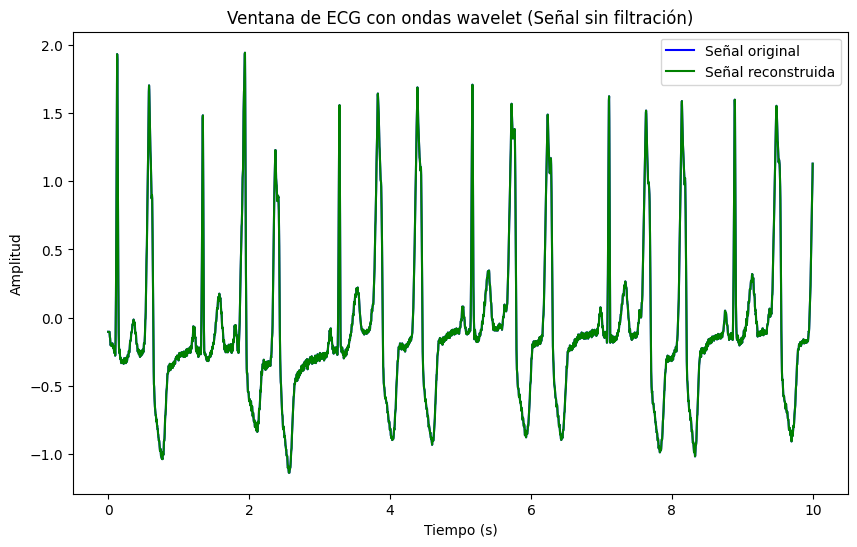

In [19]:
#Visualización de la señal por segmentación mediante ventana Wavelet
#Creación de ondas Wavelet
import pywt

#Para la señal original (Visualización del ruido)

window_duration = 10  # Duración de la ventana en segundos
window_samples = int(window_duration * fs3)
ecg_window = signal208_1[:window_samples]

# Obtener los coeficientes wavelet utilizando la transformada wavelet
wavelet = 'db4'  # Tipo de onda wavelet a utilizar (puedes elegir otro según tus necesidades)
coeffs = pywt.wavedec(ecg_window, wavelet)

# Reconstruir la señal a partir de los coeficientes wavelet (si es necesario)
reconstructed_ecg = pywt.waverec(coeffs, wavelet)

# Graficar la señal original y la señal reconstruida
time = np.arange(window_samples) / fs3

plt.figure(figsize=(10, 6))
plt.plot(time, ecg_window,label='Señal original',color="blue")
plt.plot(time, reconstructed_ecg, label='Señal reconstruida',color="green")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Ventana de ECG con ondas wavelet (Señal sin filtración)')
plt.legend()
plt.show()

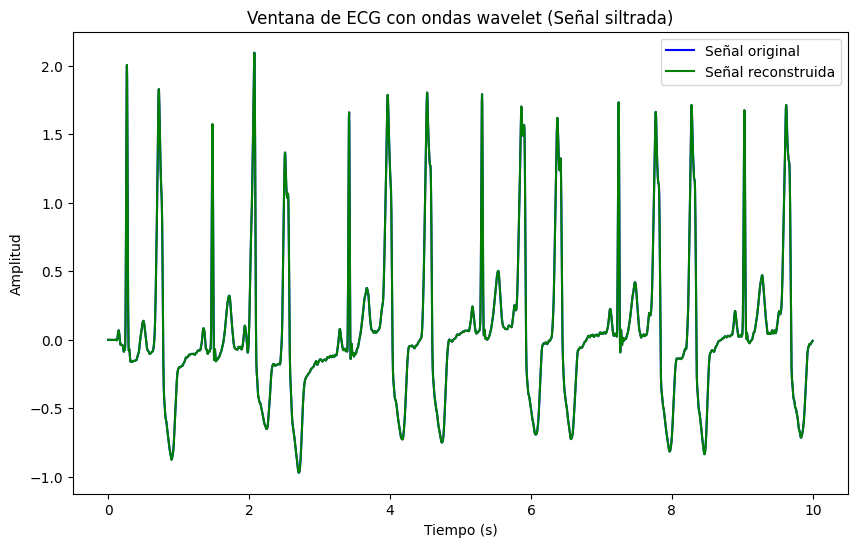

In [20]:
window_duration = 10  # Duración de la ventana en segundos
window_samples = int(window_duration * fs3)
ecg_window = Sf[:window_samples]

# Obtener los coeficientes wavelet utilizando la transformada wavelet
wavelet = 'db4'  # Tipo de onda wavelet a utilizar (puedes elegir otro según tus necesidades)
coeffs = pywt.wavedec(ecg_window, wavelet)

# Reconstruir la señal a partir de los coeficientes wavelet (si es necesario)
reconstructed_ecg = pywt.waverec(coeffs, wavelet)

# Graficar la señal original y la señal reconstruida
time = np.arange(window_samples) / fs3

plt.figure(figsize=(10, 6))
plt.plot(time, ecg_window,label='Señal original',color="blue")
plt.plot(time, reconstructed_ecg, label='Señal reconstruida',color="green")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Ventana de ECG con ondas wavelet (Señal siltrada)')
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

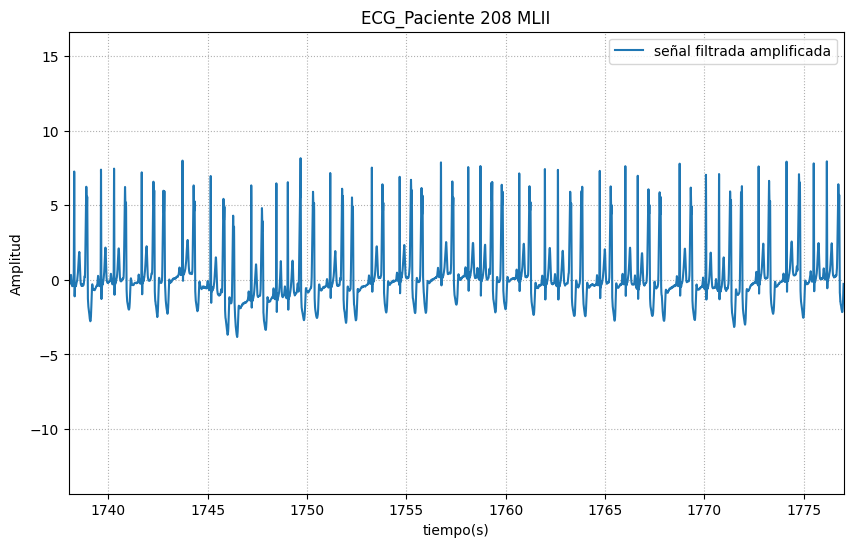

In [27]:
#Siempre podemos amplificar la señal para mejorar los fines de la aplicación
factor_ampl=4
Sf_ampl= Sf*factor_ampl

plt.figure()
plt.figure(figsize=(10, 6))
plt.plot(t3 ,Sf_ampl, label="señal filtrada amplificada")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("tiempo(s)")
plt.ylabel("Amplitud")
plt.title("ECG_Paciente 208 MLII")
plt.legend(loc="upper right")
plt.xlim([1738,1777])
#plt.ylim([-100*factor_ampl,100*factor_ampl])
plt.show()

In [23]:
# Definir ventana de búsqueda de la onda P (previa al pico R)
#Buscamos establecer los tiempos de inicio de la onda P previa al pico R
def Det_arritmias1(signal,r_peaks_times,momentos):

    # Definir ventana de búsqueda de la onda P (previa al pico R)
    window_start = -0.15  # Inicio de la ventana relativo al pico R (aquí se usa 150 ms antes)
    window_end = -0.04  # Fin de la ventana relativo al pico R (aquí se usa 40 ms antes)

    # Inicializar listas para almacenar los tiempos y amplitudes de las ondas P
    p_wave_times = []
    p_wave_amplitudes = []

    # Recorrer todos los tiempos de los picos R y buscar la onda P en la ventana definida
    for r_peak_time in r_peaks_times:
        window_times = np.arange(r_peak_time + window_start, r_peak_time + window_end, dt)
        window_ecg_signal = np.interp(window_times, np.arange(0, len(signal)) * dt, signal)

        # Encontrar el índice del máximo en la ventana
        max_index = np.argmax(window_ecg_signal)

        # Añadir el tiempo y la amplitud correspondiente a la onda P
        p_wave_time = window_times[max_index]
        p_wave_amplitude = window_ecg_signal[max_index]
        p_wave_times.append(p_wave_time)
        p_wave_amplitudes.append(p_wave_amplitude)

    # Identificar arritmias basadas en las características de las ondas P
    arrhythmias = []

    # Ejemplo: detectar arritmia si la amplitud de la onda P es menor que un umbral
    amplitude_threshold = 0.1  # Umbral de amplitud para detectar arritmia

    for i, amplitude in enumerate(p_wave_amplitudes):
        if amplitude < amplitude_threshold:
            arrhythmias.append(p_wave_times[i])

    # Graficar el ECG con las ondas P y las arritmias marcadas
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(0, len(signal)) * dt, signal, label='ECG')
    plt.xlim(momentos)
    plt.scatter(p_wave_times, p_wave_amplitudes, color='green', label='Ondas P')
    plt.scatter(arrhythmias, np.interp(arrhythmias, np.arange(0, len(signal)) * dt, signal), color='purple', label='Arritmias')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.title('Detección de arritmias en ECG')
    plt.legend()
    plt.show()

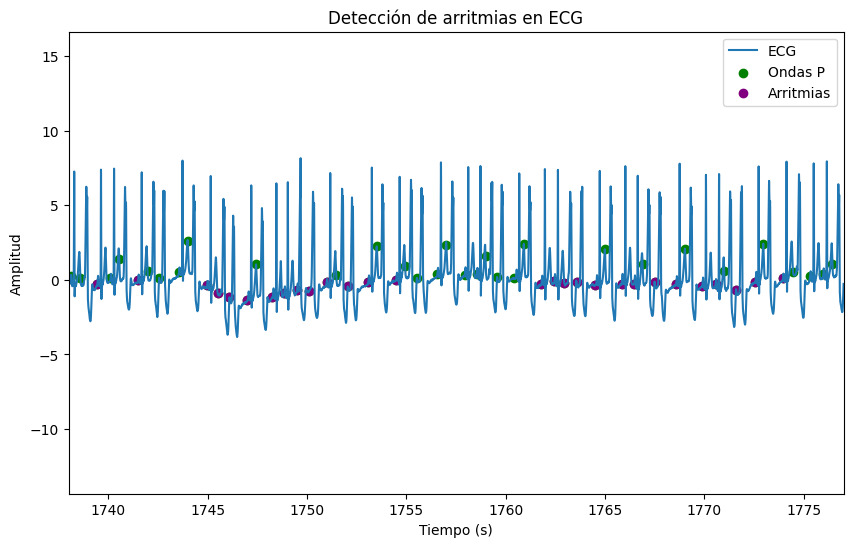

In [24]:
annotation = wfdb.rdann('208', "atr",pn_dir='mitdb')
dt=1/fs3
r_peaks_times = annotation.sample * dt
momentos=[1738,1777]
Det_arritmias1(Sf_ampl,r_peaks_times,momentos)

In [25]:
#Hallamos los picos R para luego determinar la posible presencia de ritmos inusuales (alteración de la frecuencia cardiaca)
#La detección de los picos R se realizará mediante la transformada de la derivada
from scipy.signal import find_peaks

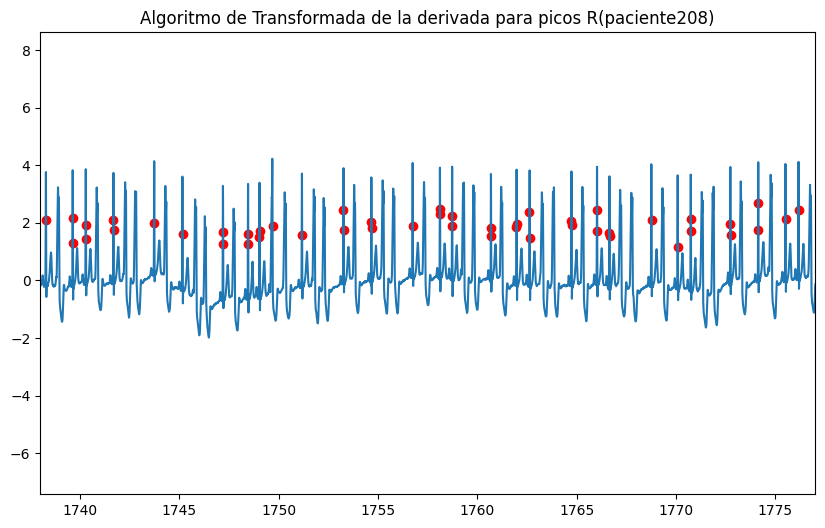

In [30]:
# Normalización
norm_ecg = Sf_ampl / np.std(Sf_ampl)
# Calcula la derivada de primer orden de la señal
ecg_derivative = np.gradient(norm_ecg)
# Obtiene el valor absoluto de la derivada
ecg_derivative_abs = np.abs(ecg_derivative)
# Calcula un umbral como un porcentaje del valor máximo de la señal derivada
threshold = 0.7 * np.max(ecg_derivative_abs)
# Encuentra los índices de los picos que superen el umbral definido
r_peaks_indices, _ = find_peaks(ecg_derivative_abs, height=threshold)

# Grafica la señal de ECG
plt.figure(figsize=(10, 6))
plt.plot(t3,norm_ecg)
plt.title("Algoritmo de Transformada de la derivada para picos R(paciente208)")
# Marca los picos R en la señal
plt.scatter(r_peaks_indices/fs3, norm_ecg[r_peaks_indices], color='red', marker='o')
plt.xlim([1738,1777])
# Muestra la gráfica
plt.show()

In [31]:
#Es importante resaltar que la aplicación del algoritmo de la transformada de la derivada también puede complementarse con el algoritmo
#De Pan-Tompinks que incluye los pasos de elevación al cuadrado de la señal y filtración con pasabajos posterior.

#Se puede detectar la diferencia de tiempos entre los cuales se realiza la aparición de los picos R para estimar alteraciones
#de la frecuencia cardiaca
rr_intervals = np.diff(r_peaks_indices) /fs3  # Diferencia entre los tiempos de picos R consecutivos, convertidos a segundos


# Identificar arritmias basadas en los intervalos RR
arrhythmias = []

# Ejemplo: detectar arritmia si hay una diferencia de más de 20% entre los intervalos RR
rr_threshold = 0.2  # Umbral de diferencia entre intervalos RR

for i in range(1, len(rr_intervals)):
    diff_ratio = abs(rr_intervals[i] - rr_intervals[i-1]) / rr_intervals[i-1]
    if diff_ratio > rr_threshold:
        arrhythmias.append(i)

# Imprimir los índices de las muestras con arritmias
print("Muestras con arritmias:", arrhythmias)

Muestras con arritmias: [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 22, 23, 24, 25, 27, 28, 29, 32, 33, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 61, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 213, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 239, 240, 241, 245, 246, 247, 248, 249, 250, 251, 